In [2]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cartopy.feature as cfeature
import os
import matplotlib.ticker as mticker
import healpy as hp
import matplotlib.colors as mcolors

import cartopy
from ulmo.analysis.spatial_plots import evals_to_healpix, evals_to_healpix_stat, show_med_LL

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# this is going to be my Healpy images

ModuleNotFoundError: No module named 'xarray'

In [3]:
aug10 = xarray.open_dataset('/home/jovyan/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc')
analysis_table = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2012.parquet')

In [4]:
eval_tbl = analysis_table
nside = 64
hpma, hp_lons, hp_lats, hp_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'mean_temperature', stat = 'mean')

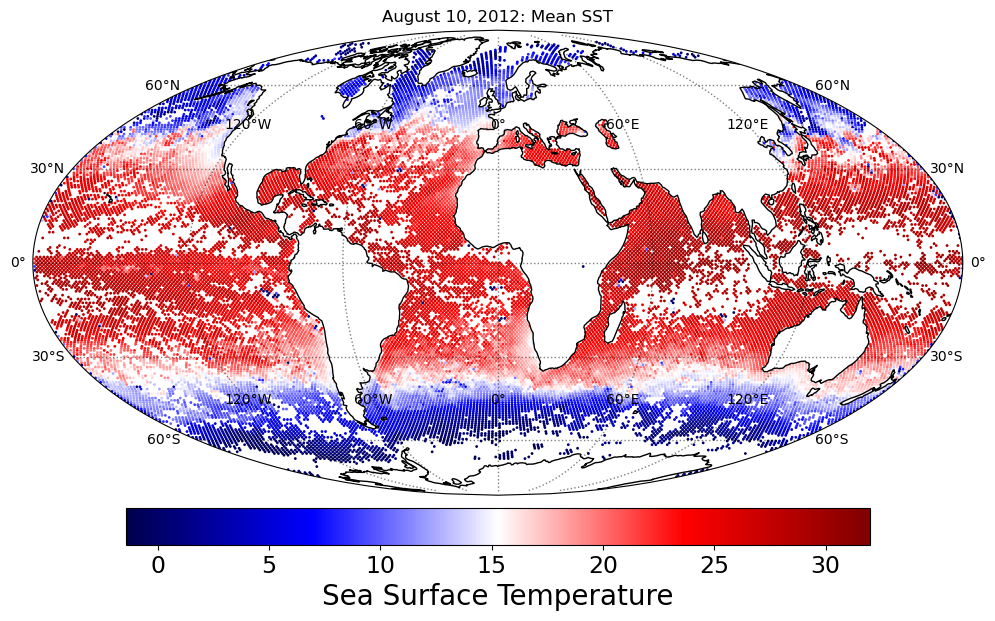

In [5]:
fig = plt.figure(figsize=(12,8))
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_values[good],  
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.02, shrink = 0.8)
clbl = 'Sea Surface Temperature'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}
plt.title("August 10, 2012: Mean SST")

plt.show()

#save_dir = os.path.expanduser('~/plots')
#save_filename = os.path.join(save_dir, 'plot1.png')

#plt.savefig(save_filename, dpi=300, bbox_inches='tight')
#plt.close(fig)

In [12]:
table_2012 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2012.parquet')
table_2013 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2013.parquet')
table_2014 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2014.parquet')
table_2015 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2015.parquet')
table_2016 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2016.parquet')
table_2017 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2017.parquet')
table_2018 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2018.parquet')
table_2019 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2019.parquet')
table_2020 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2020.parquet')

table_all = pandas.concat([table_2012, table_2013, table_2014, table_2015,
                        table_2016, table_2017, table_2018, table_2019, table_2020])
table_all.reset_index(drop=True, inplace=True)

In [39]:
eval_tbl = table_all
nside = 64
hpma, hp_lons, hp_lats, hp_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'mean_temperature', stat = 'median')
# returns evts, hp_lons, hp_lats, meds
# I think I want to plot evts

In [41]:
mask_less_than_5 = hpma < 5
hpma_mask = np.ma.masked_where(mask_less_than_5, hpma)
hpma_log = np.log10(hpma_mask)

# Plot the Healpy map with the default cartopy color scale
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Mollweide())

cm = plt.get_cmap('plasma')
good = np.invert(hpma_log.mask)
img = plt.scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=hpma_log[good],
    cmap=cm,
    s=1,
    transform=ccrs.PlateCarree()
)

# Create a new color bar associated with the log-transformed data
cb = plt.colorbar(img, orientation='horizontal', pad=0.02, shrink=0.8)
cb.ax.tick_params(labelsize=17)

# Add coastlines and other map features
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("Log10 Number of Cutouts per HEALPix Cell", fontsize=18)
#plt.show()
save_dir = os.path.expanduser('~/plots')
save_filename = os.path.join(save_dir, 'plotnumberofcutouts.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

/tmp/ipykernel_133/2504942994.py:3: RuntimeWarning: divide by zero encountered in log10
  hpma_log = np.log10(hpma_mask)


In [43]:
hpma, hp_lons, hp_lats, LL_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'LL', stat = 'median')
hpma, hp_lons, hp_lats, viirs_LL_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'VIIRS_LL', stat = 'median')

In [42]:
"""
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.Mollweide()})

cm = plt.get_cmap('seismic')
good_viirs_ll = np.invert(viirs_LL_values.mask)
img_viirs_ll = axes[0].scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=viirs_LL_values[good],
    cmap=cm,
    s=1,
    transform=ccrs.PlateCarree()
)
axes[0].coastlines(zorder=10)
axes[0].add_feature(cfeature.LAND, color='lightgray', zorder=0)
axes[0].set_global()
axes[0].gridlines(draw_labels=True)

cm = plt.get_cmap('seismic')
good_ll = np.invert(LL_values.mask)
img_ll = axes[1].scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=LL_values[good],
    cmap=cm,
    s=1,
    transform=ccrs.PlateCarree()
)
axes[1].coastlines(zorder=10)
axes[1].add_feature(cfeature.LAND, color='lightgray', zorder=0)
axes[1].set_global()
axes[1].gridlines(draw_labels=True)

# Create colorbars for both plots
cax_viirs_ll = fig.add_axes([0.15, 0.15, 0.3, 0.02])
cbar_viirs_ll = plt.colorbar(img_viirs_ll, cax=cax_viirs_ll, orientation='horizontal')
cbar_viirs_ll.set_label('VIIRS L2 LL', fontsize=14)
cbar_viirs_ll.ax.tick_params(labelsize=12)

cax_ll = fig.add_axes([0.57, 0.15, 0.3, 0.02])
cbar_ll = plt.colorbar(img_ll, cax=cax_ll, orientation='horizontal')
cbar_ll.set_label('L3S LL', fontsize=14)
cbar_ll.ax.tick_params(labelsize=12)

plt.suptitle("Median LL per HEALPix Cell", fontsize=18)
plt.show()
"""

'\nfig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={\'projection\': ccrs.Mollweide()})\n\ncm = plt.get_cmap(\'seismic\')\ngood_viirs_ll = np.invert(viirs_LL_values.mask)\nimg_viirs_ll = axes[0].scatter(\n    x=hp_lons[good],\n    y=hp_lats[good],\n    c=viirs_LL_values[good],\n    cmap=cm,\n    s=1,\n    transform=ccrs.PlateCarree()\n)\naxes[0].coastlines(zorder=10)\naxes[0].add_feature(cfeature.LAND, color=\'lightgray\', zorder=0)\naxes[0].set_global()\naxes[0].gridlines(draw_labels=True)\n\ncm = plt.get_cmap(\'seismic\')\ngood_ll = np.invert(LL_values.mask)\nimg_ll = axes[1].scatter(\n    x=hp_lons[good],\n    y=hp_lats[good],\n    c=LL_values[good],\n    cmap=cm,\n    s=1,\n    transform=ccrs.PlateCarree()\n)\naxes[1].coastlines(zorder=10)\naxes[1].add_feature(cfeature.LAND, color=\'lightgray\', zorder=0)\naxes[1].set_global()\naxes[1].gridlines(draw_labels=True)\n\n# Create colorbars for both plots\ncax_viirs_ll = fig.add_axes([0.15, 0.15, 0.3, 0.02])\ncbar_viirs_ll = pl

In [44]:
hp_diff = viirs_LL_values - LL_values

In [46]:
fig = plt.figure(figsize=(12,8)) # makes plot
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_diff.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good], 
    vmin = -400, vmax = 400,
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0., shrink = 0.8)
clbl = 'L2_VIIRS_LL - L3S_LL'
cb.set_label(clbl, fontsize=15.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("Difference in Median LL", fontsize=18)
#plt.show()
# this appears to be much more randomly scattered than the LLC paper version
# shrink color bar before saving

save_dir = os.path.expanduser('~/plots')
save_filename = os.path.join(save_dir, 'mediandiffLL.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [47]:
"""
fig = plt.figure(figsize=(12,8))
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
cm.set_bad(color="gray")

#masked_hp_diff = np.ma.array(hp_diff, mask=~np.logical_and(hp_diff >= -197, hp_diff <= 197))

img = plt.scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good] + 75,  # Use the masked array here
    vmin=-400,
    vmax=400,
    cmap=cm,
    s=1,
    transform=tformP
)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'difference in median LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("L2_VIIRS_LL - L3S_LL", fontsize=18)
plt.show()
"""

'\nfig = plt.figure(figsize=(12,8))\ncolor=\'seismic\'\nplt.clf()\n\ntformM = ccrs.Mollweide()\ntformP = ccrs.PlateCarree()\n\nax = plt.axes(projection=tformM)\n\ncm = plt.get_cmap(color)\ncm.set_bad(color="gray")\n\n#masked_hp_diff = np.ma.array(hp_diff, mask=~np.logical_and(hp_diff >= -197, hp_diff <= 197))\n\nimg = plt.scatter(\n    x=hp_lons[good],\n    y=hp_lats[good],\n    c=hp_diff[good] + 75,  # Use the masked array here\n    vmin=-400,\n    vmax=400,\n    cmap=cm,\n    s=1,\n    transform=tformP\n)\n\ncb = plt.colorbar(img, orientation=\'horizontal\', pad=0.)\nclbl = \'difference in median LL\'\ncb.set_label(clbl, fontsize=20.)\ncb.ax.tick_params(labelsize=17)\nax.coastlines(zorder=10)\nax.add_feature(cfeature.LAND, color=\'lightgray\', zorder=0)\nax.set_global()\n    \ngl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,\n                  color=\'black\', alpha=0.5, linestyle=\':\', draw_labels=True)\n\ngl.top_labels = True\ngl.left_labels = True\ngl.right_labels = True\ng

In [61]:
fig = plt.figure(figsize=(12, 8))
color = 'seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

# Create a custom color map with gray centered in the color bar
cmap = plt.cm.seismic
cmap.set_bad(color="gray")

# Create a custom colormap normalization that includes gray values
norm = mcolors.Normalize(vmin=-400, vmax=400)

masked_hp_diff = np.ma.masked_where(np.logical_and(hp_diff >= -197, hp_diff <= 197), hp_diff)

img = plt.scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=masked_hp_diff[good],  # Use the masked array here
    cmap=cmap,
    norm=norm,
    s=1,
    transform=tformP
)

# Manually create the color bar without arrows
cb = plt.colorbar(img, orientation='horizontal', pad=0., ticks=[-400, -197, 0, 197, 400], shrink = 0.8)
clbl = 'L2_VIIRS_LL - L3S_LL'
cb.set_label(clbl, fontsize=15.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("Difference in Median Log Likelihood", fontsize=18)
#plt.show()

save_dir = os.path.expanduser('~/plots')
save_filename = os.path.join(save_dir, 'maskeddiffLL.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [6]:
nside = 64
hpma, hp_lons, hp_lats, values = evals_to_healpix_stat(eval_tbl, nside, metric = 'DT', stat = 'median')
hpma, hp_lons, hp_lats, viirs_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'VIIRS_DT', stat = 'median')

In [7]:
hp_diff = viirs_values - values

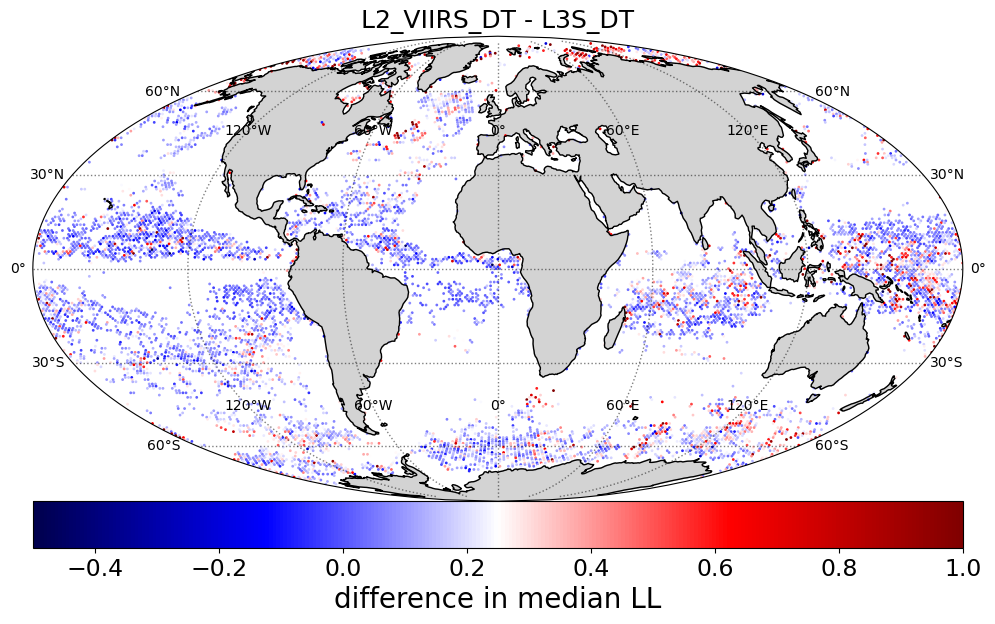

In [11]:
fig = plt.figure(figsize=(12,8))
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(values.mask)
img = plt.scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good],
    cmap=cm,
    s=1,vmin = -0.5, vmax = 1,
    transform=tformP
)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'difference in median LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("L2_VIIRS_DT - L3S_DT", fontsize=18)
plt.show()

In [5]:
table_all = table_all.dropna(subset=['LL'])
table_all.loc[:,'local_timedelta'] = pandas.to_timedelta(table_all.loc[:,'lon'] / 15, unit='H')
table_all.loc[:,'local_suntime'] = table_all.loc[:,'VIIRS_datetime'] + table_all.loc[:,'local_timedelta']
normalized_date = table_all.loc[:,'local_suntime'].dt.normalize()
time_component_timedelta = pandas.to_timedelta(table_all.loc[:,'local_suntime'].dt.hour, unit='h') + pandas.to_timedelta(table_all['local_suntime'].dt.minute, unit='m') + pandas.to_timedelta(table_all.loc[:,'local_suntime'].dt.second, unit='s')

table_all.loc[:,'L2_local_suntime'] = normalized_date + time_component_timedelta
table_all.loc[:,'L2_local_suntime_hours'] = table_all.loc[:,'L2_local_suntime'].dt.hour + table_all.loc[:,'L2_local_suntime'].dt.minute / 60 + table_all.loc[:,'L2_local_suntime'].dt.second / 3600

In [36]:
nighttime_start = 22.0
nighttime_end = 6.0

night = table_all[
    (table_all['L2_local_suntime_hours'] >= nighttime_start) |
    (table_all['L2_local_suntime_hours'] <= nighttime_end)
]

day = table_all[
    (table_all['L2_local_suntime_hours'] <= nighttime_start) &
    (table_all['L2_local_suntime_hours'] >= nighttime_end)
]

night.loc[:,'diff_LL'] = night.loc[:,'VIIRS_LL'] - night.loc[:,'LL']

/tmp/ipykernel_133/3407233847.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night.loc[:,'diff_LL'] = night.loc[:,'VIIRS_LL'] - night.loc[:,'LL']


In [31]:
np.mean(night['L2_local_suntime_hours'].values)

2.1502376937684544

In [63]:
nside = 64
hpma, hp_lons, hp_lats, LL_values = evals_to_healpix_stat(night, nside, metric = 'LL', stat = 'median')
hpma, hp_lons, hp_lats, viirs_LL_values = evals_to_healpix_stat(night, nside, metric = 'VIIRS_LL', stat = 'median')
hp_diff = viirs_LL_values - LL_values

In [64]:
fig = plt.figure(figsize=(12,8))
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_diff.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good],
    cmap=cm,
    s=1,
    transform=tformP, vmin = -400, vmax = 400)

cb = plt.colorbar(img, orientation='horizontal', pad=0., shrink = 0.8)
clbl = 'L2_VIIRS_LL - L3S_LL'
cb.set_label(clbl, fontsize=15.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("Night: Difference in Median LL's", fontsize=18)
#plt.show()

save_dir = os.path.expanduser('~/plots')
save_filename = os.path.join(save_dir, 'nightLL.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [65]:
nside = 64
hpma, hp_lons, hp_lats, LL_values = evals_to_healpix_stat(day, nside, metric = 'LL', stat = 'median')
hpma, hp_lons, hp_lats, viirs_LL_values = evals_to_healpix_stat(day, nside, metric = 'VIIRS_LL', stat = 'median')
hp_diff = viirs_LL_values - LL_values

In [67]:
fig = plt.figure(figsize=(12,8))
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_diff.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good],
    cmap=cm,
    s=1,
    transform=tformP, vmin = -400, vmax = 400)

cb = plt.colorbar(img, orientation='horizontal', pad=0., shrink = 0.8)
clbl = 'L2_VIIRS_LL - L3S_LL'
cb.set_label(clbl, fontsize=15.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("Day: Difference in Median LL's", fontsize=18)
#plt.show()

save_dir = os.path.expanduser('~/plots')
save_filename = os.path.join(save_dir, 'dayLL.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [81]:
east_coast_us = table_all[(
    (table_all['lon'] >= -85.0) & (table_all['lon'] <= -65.0))]
east_coast_us = east_coast_us[( 
    (east_coast_us['lat'] >= 25.0) & (east_coast_us['lat'] <= 45.0))]

In [83]:
nside = 64
hpma, hp_lons, hp_lats, temp = evals_to_healpix_stat(east_coast_us, nside, metric = 'mean_temperature', stat = 'median')

In [93]:
fig = plt.figure(figsize=(12, 8))
color = 'seismic'
plt.clf()

tformP = ccrs.PlateCarree()

ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection

cm = plt.get_cmap(color)
good = np.invert(temp.mask)

# Scatter plot using latitude and longitude directly
img = plt.scatter(x=hp_lons[good],
                  y=hp_lats[good],
                  c=temp[good],
                  cmap=cm,
                  s=200,
                  transform=tformP, vmin=20, vmax=30)  # Adjust vmin and vmax

cb = plt.colorbar(img, orientation='horizontal', pad=0.05, shrink = 0.6)
clbl = 'Median Temperature in HEALPix Cell'
cb.set_label(clbl, fontsize=12)
cb.ax.tick_params(labelsize=10)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True

save_dir = os.path.expanduser('~/plots')
save_filename = os.path.join(save_dir, 'ne.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)